## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==========

Epoch 48/50
50000/50000 [==============================] - 2s 41us/step - loss: 2.2090 - accuracy: 0.1476 - val_loss: 2.1504 - val_accuracy: 0.1833
Epoch 49/50
50000/50000 [==============================] - 2s 42us/step - loss: 2.3124 - accuracy: 0.1081 - val_loss: 2.3075 - val_accuracy: 0.1000
Epoch 50/50
50000/50000 [==============================] - 2s 41us/step - loss: 2.3048 - accuracy: 0.0974 - val_loss: 2.3060 - val_accuracy: 0.1001
Experiment with LR = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_______________________________________________

50000/50000 [==============================] - 2s 42us/step - loss: 0.6821 - accuracy: 0.7519 - val_loss: 1.6607 - val_accuracy: 0.5291
Epoch 47/50
50000/50000 [==============================] - 2s 42us/step - loss: 0.6387 - accuracy: 0.7713 - val_loss: 1.7181 - val_accuracy: 0.5191
Epoch 48/50
50000/50000 [==============================] - 2s 45us/step - loss: 0.6506 - accuracy: 0.7655 - val_loss: 1.6730 - val_accuracy: 0.5382
Epoch 49/50
50000/50000 [==============================] - 2s 40us/step - loss: 0.6170 - accuracy: 0.7779 - val_loss: 1.7564 - val_accuracy: 0.5309
Epoch 50/50
50000/50000 [==============================] - 2s 41us/step - loss: 0.6065 - accuracy: 0.7822 - val_loss: 1.7413 - val_accuracy: 0.5262
Experiment with LR = 0.001000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
___________________________

50000/50000 [==============================] - 2s 41us/step - loss: 1.0332 - accuracy: 0.6368 - val_loss: 1.3684 - val_accuracy: 0.5312
Epoch 45/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.0093 - accuracy: 0.6450 - val_loss: 1.3199 - val_accuracy: 0.5389
Epoch 46/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.0194 - accuracy: 0.6426 - val_loss: 1.3331 - val_accuracy: 0.5358
Epoch 47/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.0132 - accuracy: 0.6429 - val_loss: 1.3155 - val_accuracy: 0.5412
Epoch 48/50
50000/50000 [==============================] - 2s 41us/step - loss: 0.9908 - accuracy: 0.6516 - val_loss: 1.3155 - val_accuracy: 0.5453
Epoch 49/50
50000/50000 [==============================] - 2s 41us/step - loss: 0.9716 - accuracy: 0.6590 - val_loss: 1.3241 - val_accuracy: 0.5379
Epoch 50/50
50000/50000 [==============================] - 2s 41us/step - loss: 0.9587 - accuracy: 0.6670 - val_loss: 1.3647

50000/50000 [==============================] - 2s 41us/step - loss: 1.5868 - accuracy: 0.4456 - val_loss: 1.5971 - val_accuracy: 0.4389
Epoch 43/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.5818 - accuracy: 0.4485 - val_loss: 1.5890 - val_accuracy: 0.4432
Epoch 44/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.5765 - accuracy: 0.4492 - val_loss: 1.5883 - val_accuracy: 0.4429
Epoch 45/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.5723 - accuracy: 0.4522 - val_loss: 1.5828 - val_accuracy: 0.4442
Epoch 46/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.5686 - accuracy: 0.4530 - val_loss: 1.5766 - val_accuracy: 0.4482
Epoch 47/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.5643 - accuracy: 0.4542 - val_loss: 1.5751 - val_accuracy: 0.4472
Epoch 48/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.5602 - accuracy: 0.4551 - val_loss: 1.5726

50000/50000 [==============================] - 2s 41us/step - loss: 1.9442 - accuracy: 0.3215 - val_loss: 1.9421 - val_accuracy: 0.3237
Epoch 41/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.9402 - accuracy: 0.3229 - val_loss: 1.9382 - val_accuracy: 0.3234
Epoch 42/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.9363 - accuracy: 0.3238 - val_loss: 1.9344 - val_accuracy: 0.3255
Epoch 43/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.9325 - accuracy: 0.3245 - val_loss: 1.9307 - val_accuracy: 0.3255
Epoch 44/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.9289 - accuracy: 0.3254 - val_loss: 1.9271 - val_accuracy: 0.3283
Epoch 45/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.9254 - accuracy: 0.3278 - val_loss: 1.9236 - val_accuracy: 0.3317
Epoch 46/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.9218 - accuracy: 0.3284 - val_loss: 1.9203

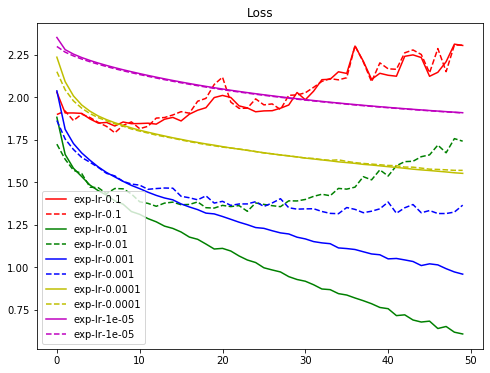

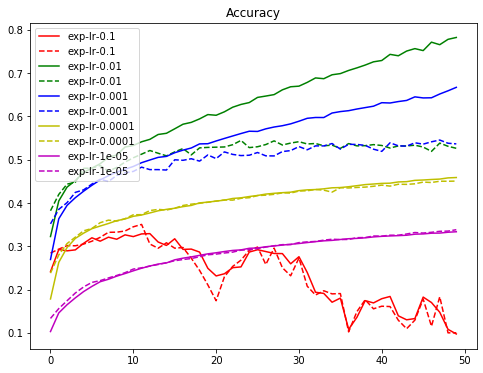

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()